In [14]:
import numpy as np
import matplotlib.pyplot as plt

big_font = 25
medium_font = 20
small_font = 15

In [23]:
logMbins = np.logspace(np.log10(.3), np.log10(13), 15) 
logPbins = np.logspace(-2, 1, 20) 

N = 5000 
mass = np.random.uniform(np.log10(.3), np.log10(13), N) 
period = np.random.uniform(np.log10(.01), np.log10(10), N) 
detection = np.random.randint(0, 2, N)

In [24]:
logPbins

array([ 0.01      ,  0.0143845 ,  0.02069138,  0.02976351,  0.04281332,
        0.06158482,  0.08858668,  0.1274275 ,  0.18329807,  0.26366509,
        0.37926902,  0.54555948,  0.78475997,  1.12883789,  1.62377674,
        2.33572147,  3.35981829,  4.83293024,  6.95192796, 10.        ])

In [25]:
logMbins

array([ 0.3       ,  0.3926785 ,  0.513988  ,  0.67277345,  0.88061223,
        1.15265828,  1.50874707,  1.97484177,  2.58492631,  3.38348326,
        4.42873705,  5.79689935,  7.58772573,  9.93178909, 13.        ])

In [28]:
num_bins = len(logPbins) - 1
num_mass_bins = len(logMbins) - 1

num_planets_per_bin = np.zeros((num_bins, num_mass_bins))
num_detected = np.zeros((num_bins, num_mass_bins))
sensitivity = np.zeros((num_bins, num_mass_bins))

for i,p in enumerate(logPbins[:-1]):
    for j,m in enumerate(logMbins[:-1]):
        mask = (mass >= logMbins[j]) & (mass < logMbins[j+1]) & (period >= logPbins[i]) & (period < logPbins[i+1])
        detected = mask & (detection == 1)
#         print(mask.sum())
        num_planets_per_bin[i,j] = mask.sum()
        num_detected[i,j] = detected.sum()
        sensitivity[i,j] = num_detected[i,j] / num_planets_per_bin[i,j]

/var/folders/kj/bzmrgm6154j7yg37zyl66c340000gn/T/ipykernel_8592/2782439127.py:15: RuntimeWarning: invalid value encountered in double_scalars
  sensitivity[i,j] = num_detected[i,j] / num_planets_per_bin[i,j]


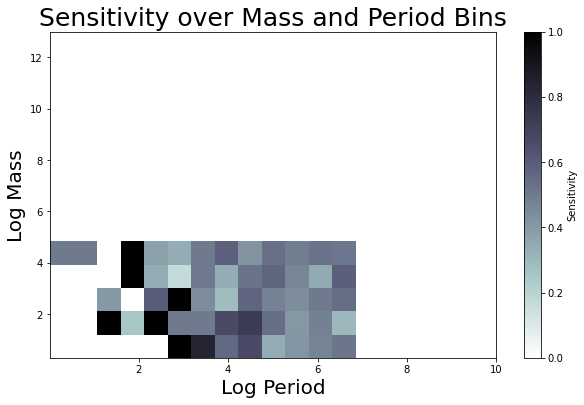

In [27]:
# Plotting the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(sensitivity.T, 
           extent=[logPbins[0], logPbins[-1], logMbins[0], logMbins[-1]], 
           aspect='auto', 
           origin='lower', 
           cmap='bone_r')

plt.colorbar(label='Sensitivity')

plt.xlabel('Log Period', fontsize = medium_font)
plt.ylabel('Log Mass', fontsize = medium_font)
plt.title('Sensitivity over Mass and Period Bins', fontsize = big_font)

plt.show()